In [1]:
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import pickle

In [2]:
data = pd.read_csv("data\measures_v2.csv")

In [5]:
data

u_q    coolant  stator_winding       u_d  stator_tooth  \
0       -0.450682  18.805172       19.086670 -0.350055     18.293219   
1       -0.325737  18.818571       19.092390 -0.305803     18.294807   
2       -0.440864  18.828770       19.089380 -0.372503     18.294094   
3       -0.327026  18.835567       19.083031 -0.316199     18.292542   
4       -0.471150  18.857033       19.082525 -0.332272     18.291428   
...           ...        ...             ...       ...           ...   
1330811 -2.152128  30.721298       45.274497  0.791801     41.934347   
1330812 -2.258684  30.721306       45.239017  0.778900     41.868923   
1330813 -2.130312  30.721312       45.211576  0.804914     41.804819   
1330814 -2.268498  30.721316       45.193508  0.763091     41.762220   
1330815 -2.100158  30.721319       45.132307  0.807309     41.734763   

         motor_speed       i_d       i_q         pm  stator_yoke    ambient  \
0           0.002866  0.004419  0.000328  24.554214    18.316547  19.850691   
1           0.000257  0.000606 -0.000785  24.538078    18.314955  19.850672   
2           0.002355  0.001290  0.000386  24.544693    18.326307  19.850657   
3           0.006105  0.000026  0.002046  24.554018    18.330833  19.850647   
4           0.003133 -0.064317  0.037184  24.565397    18.326662  19.850639   
...              ...       ...       ...        ...          ...        ...   
1330811     0.000380 -2.000169  1.097528  62.147780    38.653720  23.989078   
1330812     0.002985 -2.000499  1.097569  62.142646    38.656328  23.970700   
1330813     0.002301 -1.999268  1.098765  62.138387    38.650923  23.977234   
1330814     0.005662 -2.000999  1.095696  62.133422    38.655686  24.001421   
1330815     0.004395 -2.000792  1.096487  62.131429    38.660370  24.027522   

               torque  profile_id  
0        1.871008e-01          17  
1        2.454175e-01          17  
2        1.766153e-01          17  
3        2.383027e-01          17  
4        2.081967e-01          17  
...               ...         ...  
1330811 -8.116730e-60          71  
1330812 -5.815891e-60          71  
1330813 -4.167268e-60          71  
1330814 -2.985978e-60          71  
1330815 -2.139547e-60          71  

[1330816 rows x 13 columns]

## Preprocessing

In [3]:
scaler = StandardScaler()

def preprocess_inputs(df):
    df = df.copy()
    # Drop profile_id column
    df = df.drop('profile_id', axis=1)
    
    # Split df into X and y
    y = df['pm'].copy()
    X = df.drop('pm', axis=1).copy()
    
   
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
    y = pd.Series(scaler.fit_transform(y.values.reshape(-1, 1)).flatten(), name='pm')
    
    return X, y

In [4]:
X, y = preprocess_inputs(data)

# EDA

## Univariate Analysis

In [11]:
eda_df = pd.concat([X, y], axis=1).copy()

C:\Users\PC\AppData\Local\Temp\ipykernel_8368\2333660114.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_8368\2333660114.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add this line to adjust the layout
C:\Users\PC\AppData\Local\Temp\ipykernel_8368\2333660114.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_8368\2333660114.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add this line to adjust the layout
C:\Users\PC\AppData\Local\Temp\ipykernel_8368\2333660114.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_8368\2333660114.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add this line to adjust the layout
C:\Users\PC\AppData\Local\Temp\ipykernel_8368\2333660114.py:8: UserWar

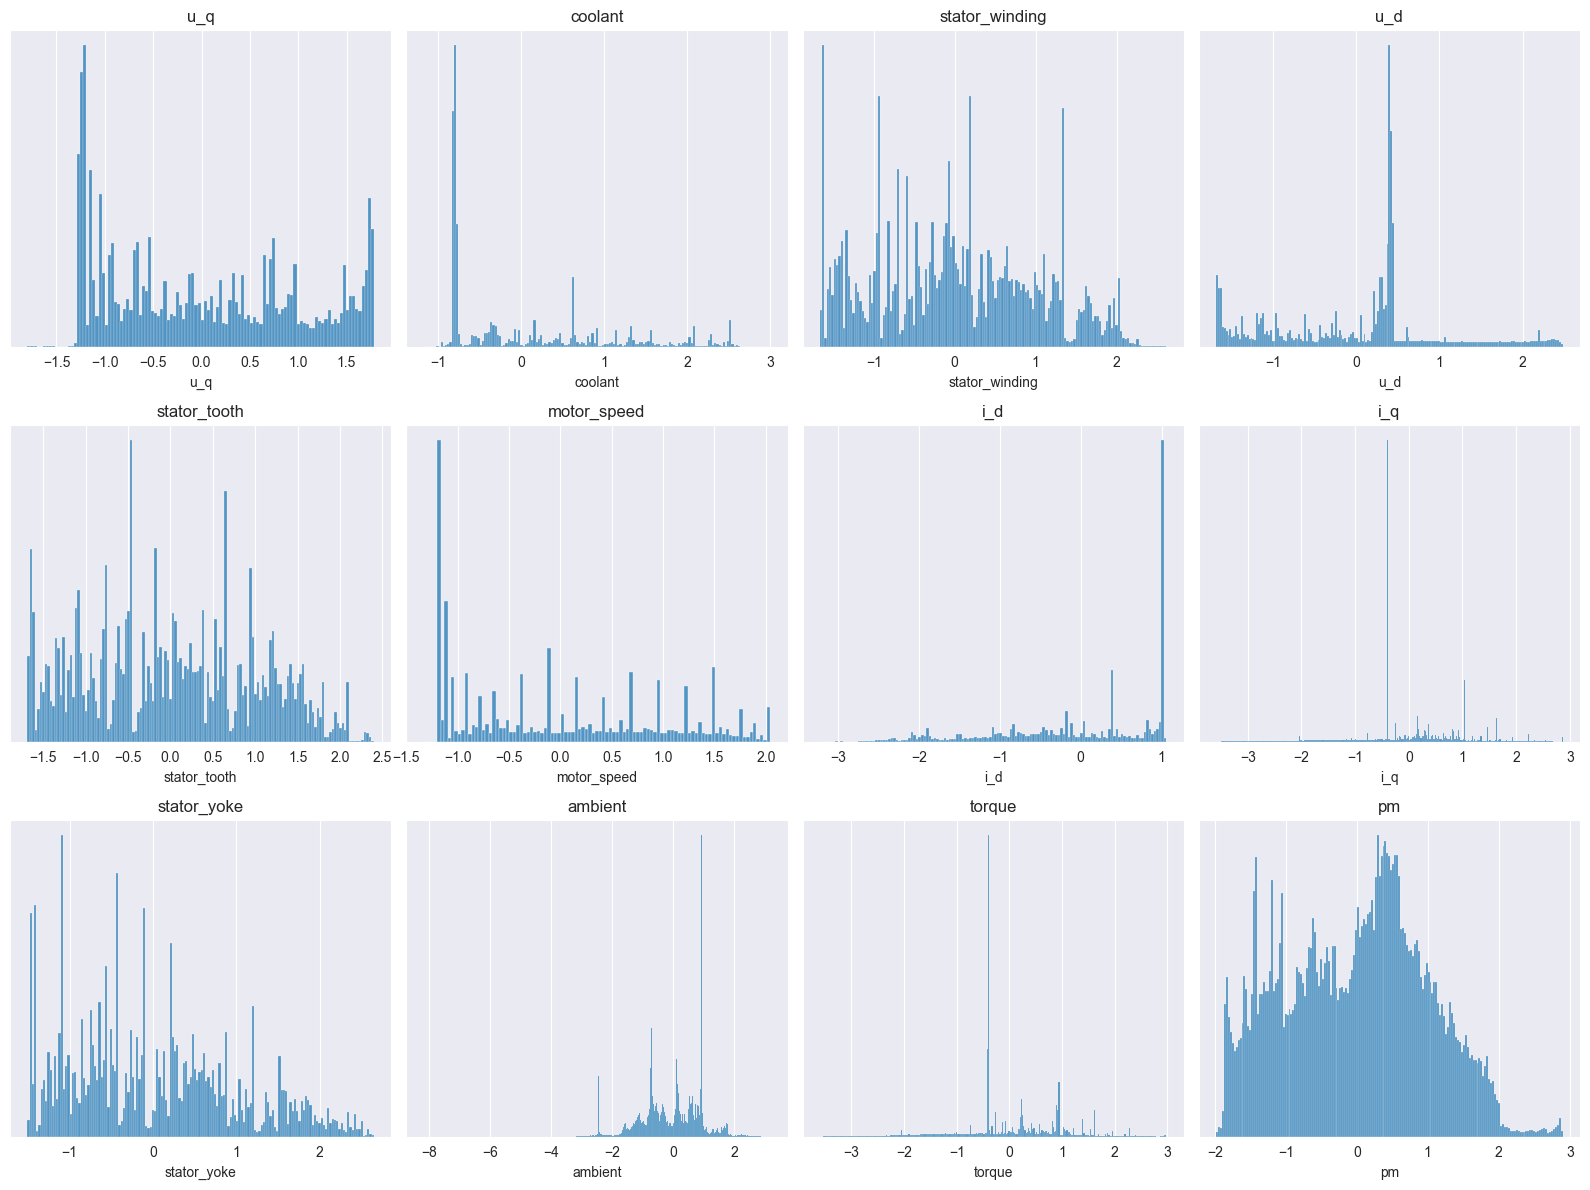

In [12]:
plt.figure(figsize=(16, 12))
for i in range(len(eda_df.columns)):
    plt.subplot(3, 4, i+1)
    sns.histplot(eda_df[eda_df.columns[i]])
    plt.tight_layout()  # Add this line to adjust the layout
    plt.gca().set_title(eda_df.columns[i])  # Set the subplot title
    plt.gca().get_yaxis().set_visible(False)  # Hide y-axis labels
    plt.tight_layout() 
# Save the pair plot as an image
displot_filename = 'displot.png'
plt.savefig(displot_filename, bbox_inches='tight')

plt.show()

In [53]:
plt.figure(figsize=(16, 12))
for i in range(len(eda_df.columns)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(eda_df[eda_df.columns[i]])
    plt.tight_layout()  # Add this line to adjust the layout
    plt.gca().set_title(eda_df.columns[i])  # Set the subplot title
    plt.gca().get_yaxis().set_visible(False)  # Hide y-axis labels
    plt.tight_layout() 
    
    # Save the pair plot as an image
pairplot_filename = 'boxplot.png'
plt.savefig(pairplot_filename, bbox_inches='tight')

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_13260\2118844995.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_13260\2118844995.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add this line to adjust the layout
C:\Users\PC\AppData\Local\Temp\ipykernel_13260\2118844995.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_13260\2118844995.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add this line to adjust the layout
C:\Users\PC\AppData\Local\Temp\ipykernel_13260\2118844995.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\PC\AppData\Local\Temp\ipykernel_13260\2118844995.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add this line to adjust the layout
C:\Users\PC\AppData\Local\Temp\ipykernel_13260\2118844995.py:8: 

## Multivariate Analysis

C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x1600 with 0 Axes>

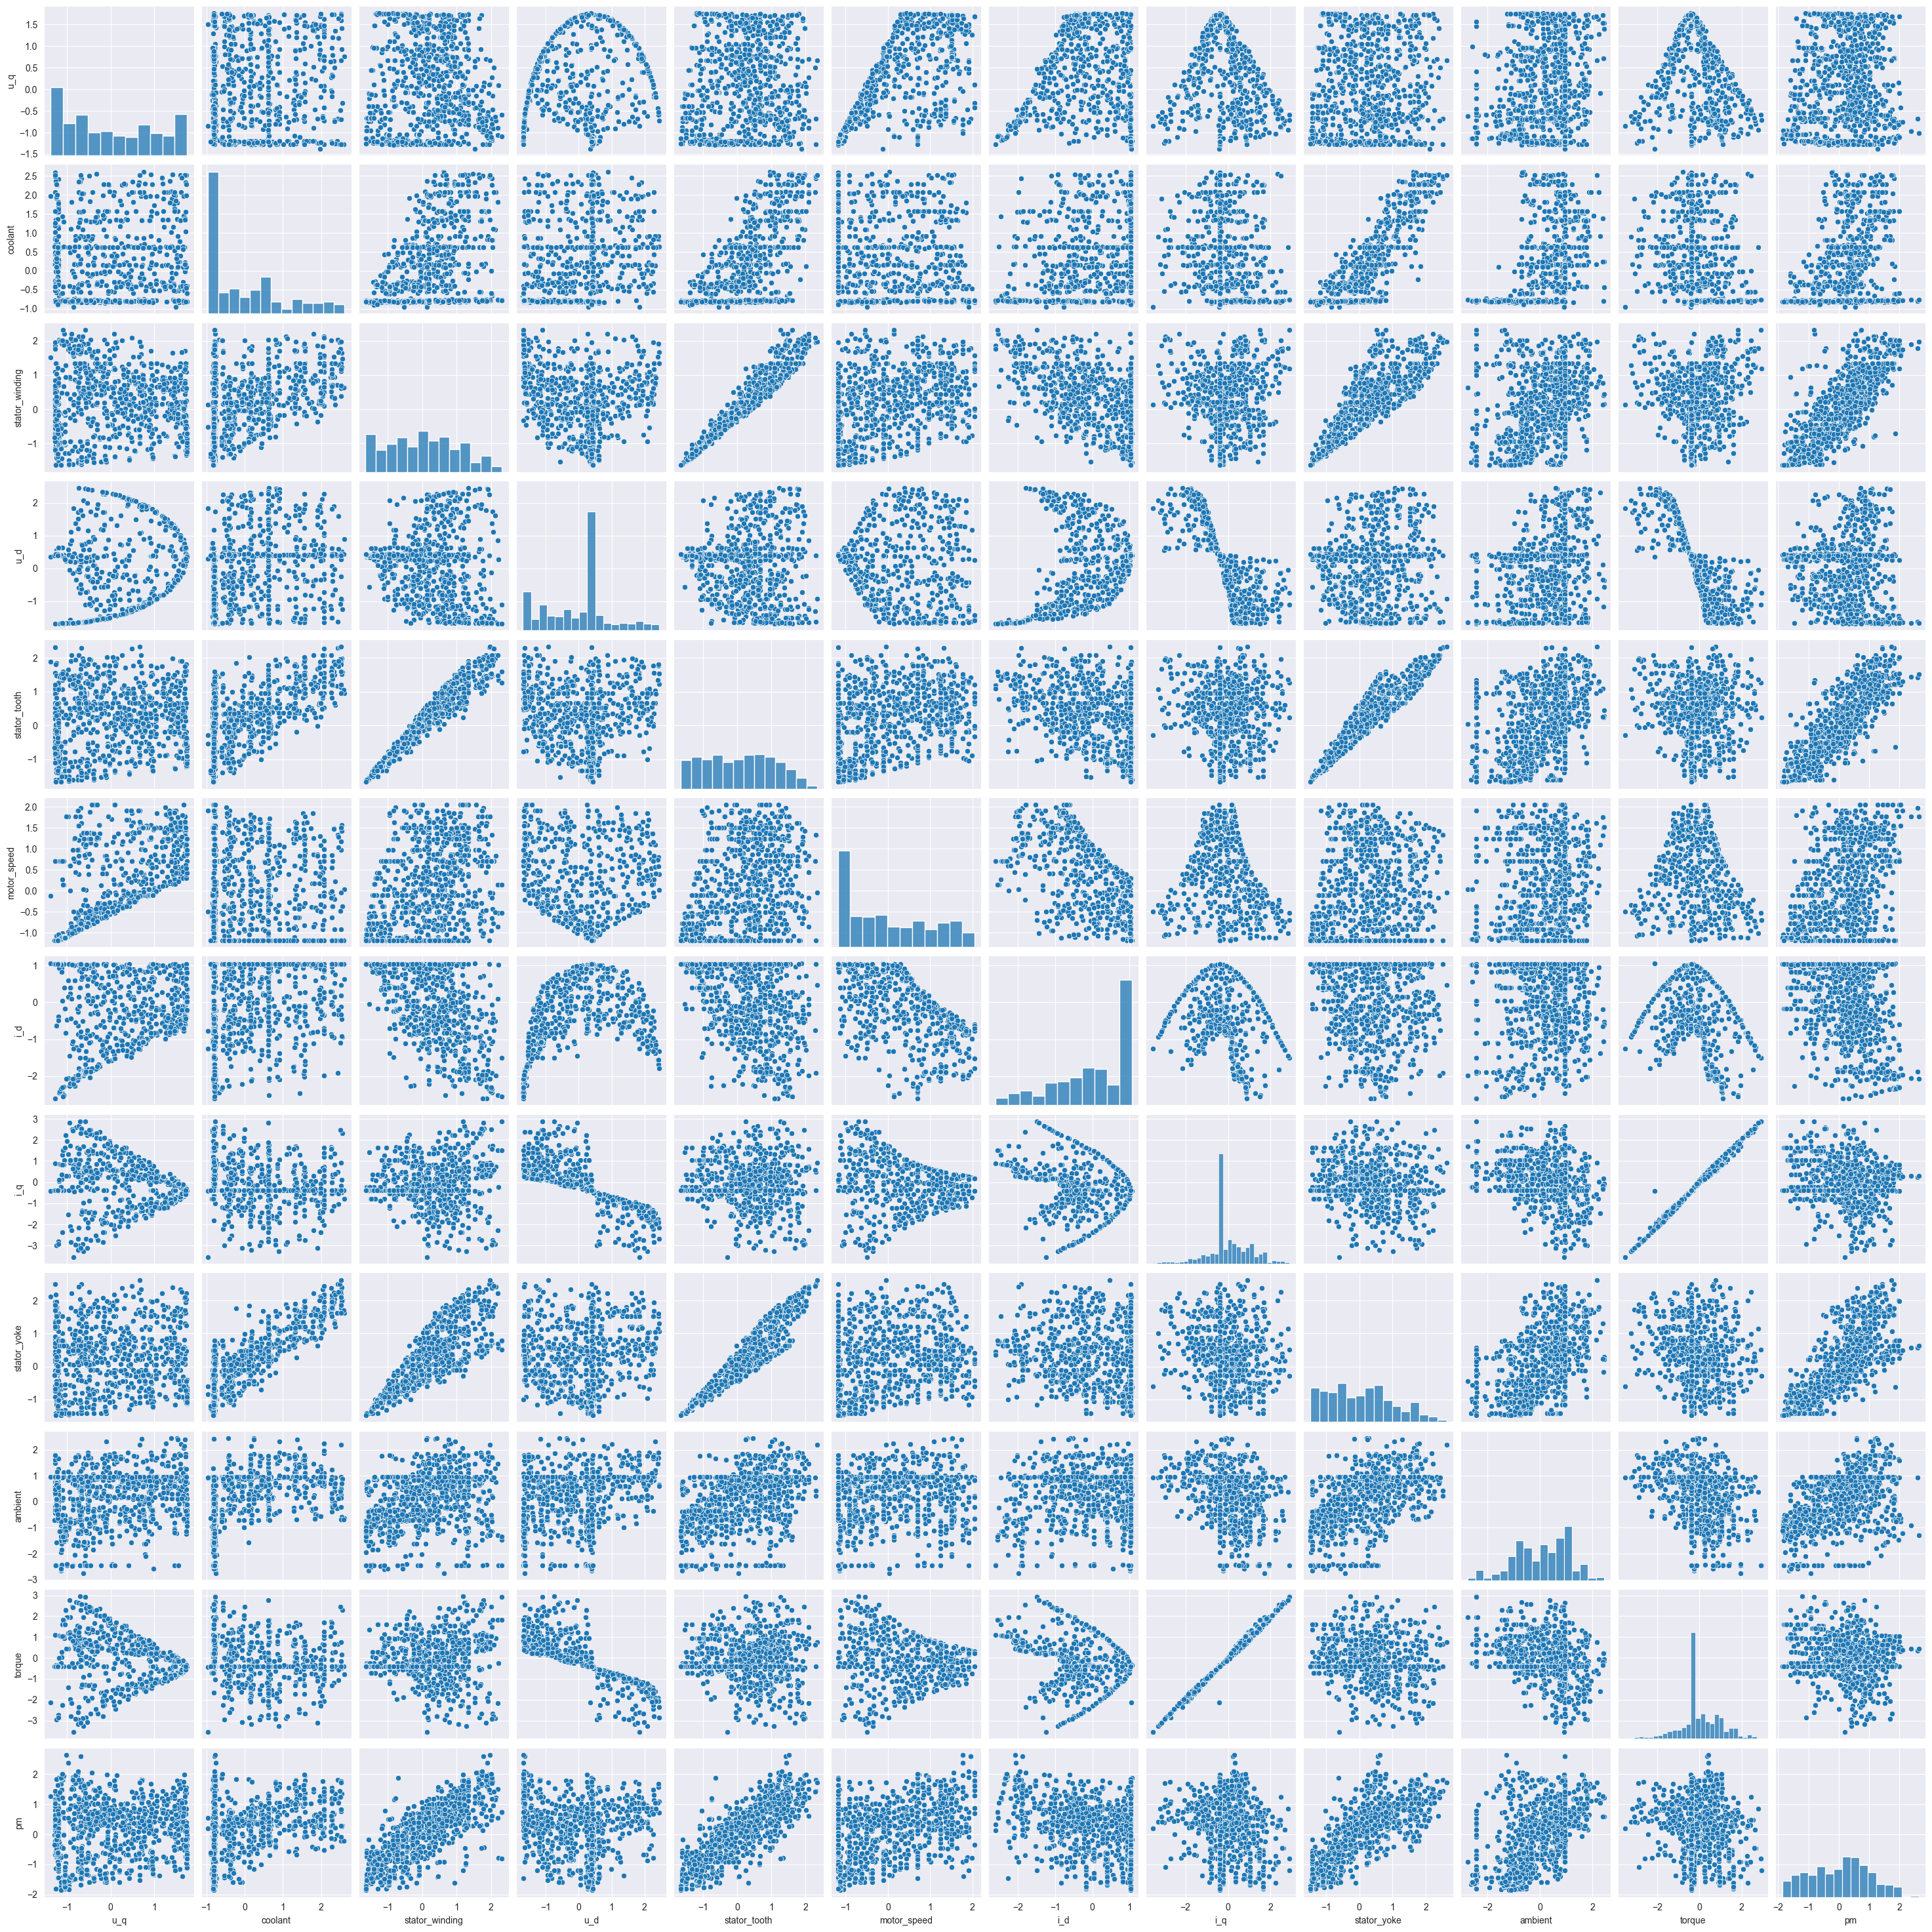

In [52]:
plt.figure(figsize=(16, 16))
sns.pairplot(eda_df.sample(1000))

# Save the pair plot as an image
pairplot_filename = 'pairplot.png'
plt.savefig(pairplot_filename, bbox_inches='tight')
plt.show()

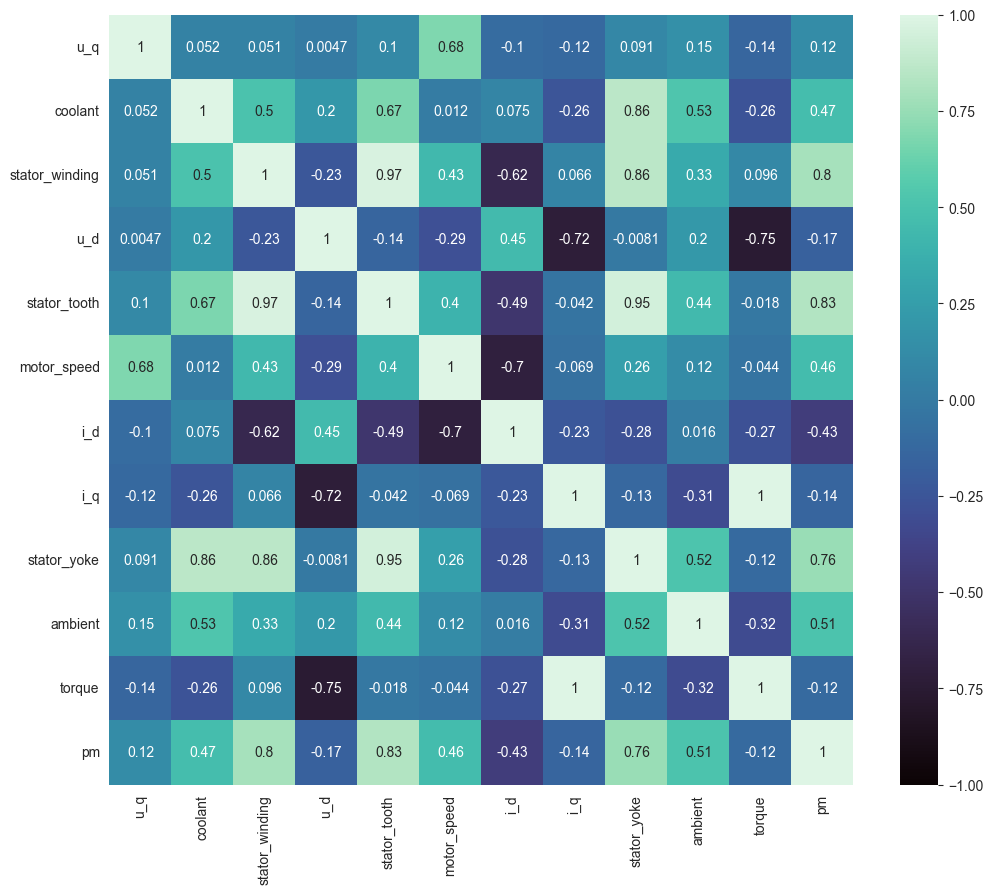

In [51]:
corr = eda_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')

# Save the heatmap as an image
heatmap_filename = 'heatmap.png'
plt.savefig(heatmap_filename, bbox_inches='tight')
plt.show()

# Training

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234) 


model = make_pipeline(scaler, LinearRegression())

param_grid = {
    'linearregression__fit_intercept': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

parameters = best_model.get_params()
weights = best_model.named_steps['linearregression'].coef_
intercept = best_model.named_steps['linearregression'].intercept_

print('Best Model Hyperparameters:', best_params)
print('Model Weights:', weights)
print('Model Intercept:', intercept)


y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Best Model Mean Squared Error:', mse)
print('Best Model Hyperparameters:', best_params)

# pickle the best model
with open('LR.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Best Model Hyperparameters: {'linearregression__fit_intercept': True}
Model Weights: [-0.30602315 -0.21241472 -2.4136453  -0.06392464  4.79149009  0.28783996
  0.14634132 -0.04856973 -1.65382807  0.17940013  0.02104317]
Model Intercept: -4.820591527300452e-16
Best Model Mean Squared Error: 0.14615301461684987
Best Model Hyperparameters: {'linearregression__fit_intercept': True}


In [24]:
with open('LR.pkl', 'rb') as model:
    model = pickle.load(model)

print("Model R^2 Score: {:.4f}".format(model.score(X_test, y_test)))

Model R^2 Score: 0.8541


## SVR

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

In [ ]:
print("SVR R^2 Score: {:.4f}".format(svr.score(X_test, y_test)))

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)  

model = make_pipeline(scaler, SVR())

param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__degree': [2, 3, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print('Best Model Hyperparameters:', best_params)


y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Best Model Mean Squared Error:', mse)
print('Best Model Hyperparameters:', best_params)

# pickle the best model
with open('SVR.pkl', 'wb') as file:
    pickle.dump(best_model, file) 